# 1. Project LIDA

LIDA is a library for generating data visualizations and data-faithful infographics. LIDA is grammar agnostic (will work with any programming language and visualization libraries e.g. matplotlib, seaborn, altair, d3 etc) and works with multiple large language model providers (OpenAI, Azure OpenAI, PaLM, Cohere, Huggingface).Details on the components of LIDA are described in [this paper](https://arxiv.org/abs/2303.02927) - star [this project](https://aka.ms/lida/github) for updates. 

LIDA _treats visualizations as code_ and provides a clean api for generating, executing, editing, explaining, evaluating and repairing visualization code. Here are some tasks you can execute with LIDA.

- ✅ Data Summarization
- ✅ Goal Generation
- ✅ Visualization Generation
- ⬜️ Visualization Editing
- ✅ Visualization Explanation
- ⬜️ Visualization Evaluation and Repair
- ✅ Visualization Recommendation
- ⬜️ Infographic Generation (beta) # pip install lida[infographics]

![LIDA Modules illustrated](https://github.com/microsoft/lida/raw/main/docs/images/lidamodules.jpg)

## 1. Data Summarization
Given a dataset, generate a compact summary of that data in a compact natural language representation that serves as context for subsequent tasks. The goal of the summarizer is to _produce an dense-but-compact information summary for a given dataset that is useful as grounding context for visualization tasks_. The grounding context is defined as one that contains information an analyst would need to understand the dataset and the tasks that can be performed on it.

See [paper](https://arxiv.org/pdf/2303.02927.pdf) for details

In [1]:
# Setup
from lida import Manager, TextGenerationConfig , llm  

csvfile = "./../1-data/kaggle/IPL-2022.csv"
lida = Manager(text_gen = llm("openai")) # palm, cohere .
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-3.5-turbo-0301", use_cache=True)

In [2]:
# Summarize
summary = lida.summarize(csvfile)
summary_data = list(summary.keys())
for keys in summary_data:
    print(keys, ":", summary[keys])

name : IPL-2022.csv
file_name : IPL-2022.csv
dataset_description : 
fields : [{'column': 'match_id', 'properties': {'dtype': 'number', 'std': 21, 'min': 1, 'max': 74, 'samples': [5, 64, 19], 'num_unique_values': 74, 'semantic_type': '', 'description': ''}}, {'column': 'date', 'properties': {'dtype': 'string', 'samples': ['May 15,2022', 'May 21,2022', 'March 26,2022'], 'num_unique_values': 62, 'semantic_type': '', 'description': ''}}, {'column': 'venue', 'properties': {'dtype': 'category', 'samples': ['Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai', 'Narendra Modi Stadium, Ahmedabad'], 'num_unique_values': 6, 'semantic_type': '', 'description': ''}}, {'column': 'team1', 'properties': {'dtype': 'category', 'samples': ['Lucknow', 'Delhi', 'Kolkata'], 'num_unique_values': 9, 'semantic_type': '', 'description': ''}}, {'column': 'team2', 'properties': {'dtype': 'category', 'samples': ['Chennai', 'Mumbai', 'Gujarat'], 'num_unique_values': 9, 'semantic_type': '', 'description': ''}}, {

## 2. Goal Generation

Given the dataset "context" generated by the summarizer, the LLM must now _generate a question (hypothesis), a visualization (that addresses the question) and a rationale (for that visualization)_. The research found that requiring the LLM to produce a rationale led to more semantically meaningful goals.

The generation API takes these parameters - the summary, the number of goals to generate (n) and a persona (optional) that influences the tone or context for the goals generated. And the textgen_config that configures parameters for the given model.

See [paper](https://arxiv.org/pdf/2303.02927.pdf) for details

In [3]:
# generate 5 goals from the summary - with the persona is a fan of the Mumbai team
goals = lida.goals(summary, n=5, textgen_config=textgen_config, persona="fam of the Mumbai team who wants to see their stats") # exploratory data analysis

# create a list of dictionaries containing the goal information
import pandas as pd
goal_list = []
for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the winning percentage of Mumbai in all stages?

**Visualization:** `Bar chart of match_winner field filtered for Mumbai team`

**Rationale:** This visualization will show the number of matches won by Mumbai in all stages of the tournament. This will help the persona to understand the team's performance throughout the tournament.



### Goal 1
---
**Question:** What is the average score of Mumbai in the first innings?

**Visualization:** `Histogram of first_ings_score field filtered for Mumbai team`

**Rationale:** This visualization will give the persona an idea of the average score of Mumbai in the first innings. This will help the persona to understand if the team is performing well in the first innings or not.



### Goal 2
---
**Question:** How does Mumbai's second innings score compare to their opponents' second innings score?

**Visualization:** `Grouped bar chart of second_ings_score field for Mumbai and their opponents`

**Rationale:** This visualization will show the comparison between Mumbai's second innings score and their opponents' second innings score. This will help the persona to understand if the team is able to chase the target set by their opponents or not.



### Goal 3
---
**Question:** What is the distribution of Mumbai's margin of victory?

**Visualization:** `Histogram of margin field filtered for Mumbai team`

**Rationale:** This visualization will give the persona an idea of the distribution of Mumbai's margin of victory. This will help the persona to understand if the team is winning matches by a large margin or a small margin.



### Goal 4
---
**Question:** Which Mumbai player has the highest score in the tournament?

**Visualization:** `Bar chart of highscore field filtered for Mumbai team`

**Rationale:** This visualization will show the highest score of Mumbai player in the tournament. This will help the persona to understand the best performing player in the team.


In [4]:

# generate 10 goals from the summary with default persona
goals = lida.goals(summary, n=10, textgen_config=textgen_config,) # exploratory data analysis

# create a list of dictionaries containing the goal information
import pandas as pd
goal_list = []
for goal in goals:
    goal_dict = {'Question': goal.question, 'Visualization': goal.visualization, 'Rationale': goal.rationale}
    goal_list.append(goal_dict)
df = pd.DataFrame(goal_list)
display(df)

,Question,Visualization,Rationale
0,What is the distribution of first innings score?,Histogram of first_ings_score,This visualization will give us an idea of how...
1,How does the distribution of first innings sco...,Boxplot of first_ings_score by venue,This visualization will help us understand the...
2,What is the distribution of second innings score?,Histogram of second_ings_score,This visualization will give us an idea of how...
3,How does the distribution of second innings sc...,Boxplot of second_ings_score by venue,This visualization will help us understand the...
4,What is the distribution of winning margins?,Histogram of margin,This visualization will give us an idea of how...
5,How does the distribution of winning margins v...,Boxplot of margin by venue,This visualization will help us understand the...
6,What is the distribution of best bowling figures?,Histogram of best_bowling_figure,This visualization will give us an idea of how...
7,How does the distribution of best bowling figu...,Boxplot of best_bowling_figure by team1,This visualization will help us understand the...
8,What is the distribution of high scores?,Histogram of highscore,This visualization will give us an idea of how...
9,How does the distribution of high scores vary ...,Boxplot of highscore by team1,This visualization will help us understand the...


## 3. Visualization Generation

Charts length: 1


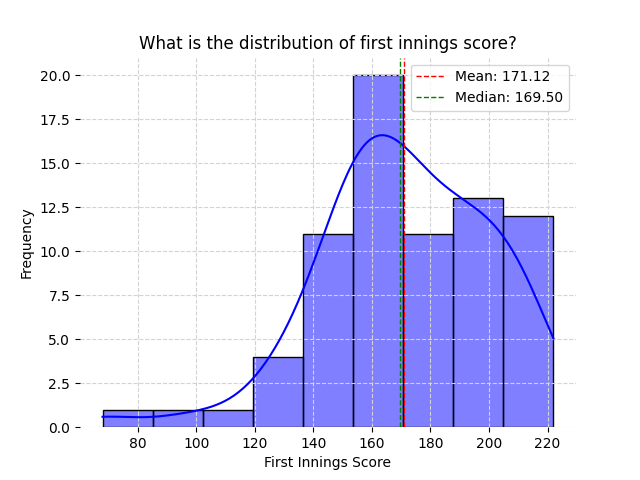

In [5]:
# Visualize A Goal 
charts = lida.visualize(summary=summary, goal=goals[0]) # exploratory data analysis
print("Charts length:", len(charts))
charts[0]

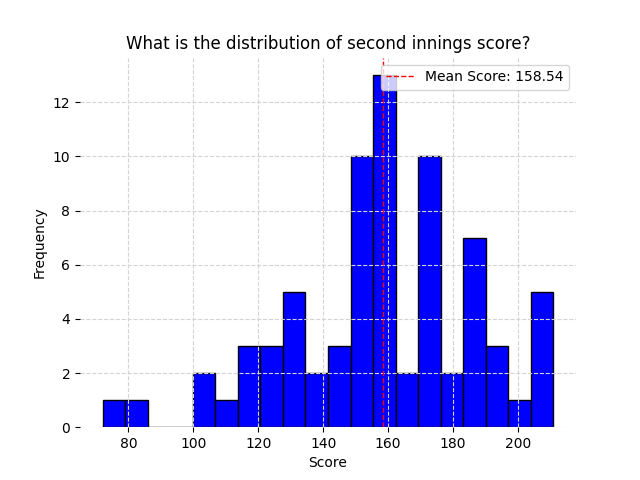

In [6]:
# Visualize a Goal - and specify a library
target = goals[2]
library = "matplotlib"
charts = lida.visualize(summary=summary, goal=target, library=library) # exploratory data analysis
charts[0]

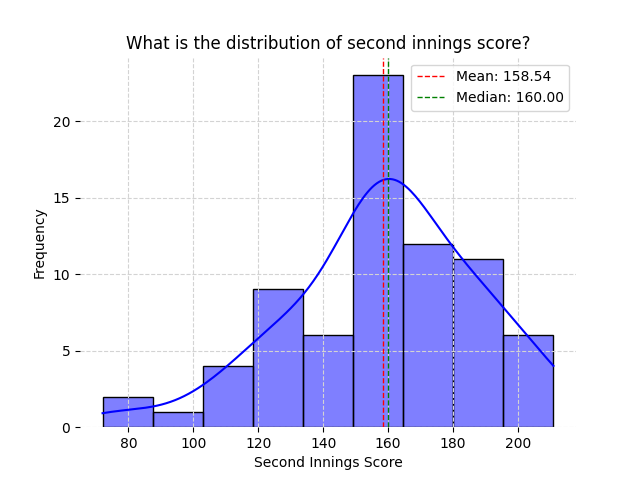

In [7]:
# Visualize it again - and specify a different library and textgen_config (change temperature)
target = goals[2]
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=target,library=library,textgen_config=textgen_config) # exploratory data analysis
charts[0]

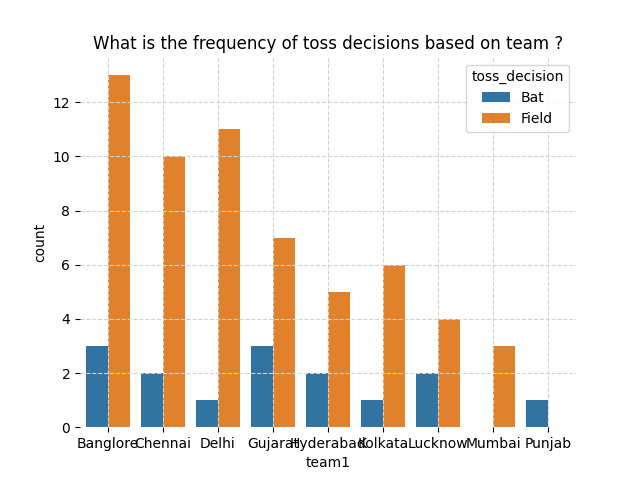

In [8]:
# Use natural language user query instead of pre-formulated goal
user_query = "What is the frequency of toss decisions based on team ?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)  
charts[0]

## 4. Visualization Explanation

In [9]:
# Explain visualization
explanation = lida.explain(code=charts[0].code)
for obj in explanation[0]:
    display(obj)


{'section': 'accessibility',
 'code': 'None',
 'explanation': "The goal of the chart is to show the frequency of toss decisions based on team. The chart is a barplot with 'team1' on the x-axis, 'count' on the y-axis, and 'toss_decision' as the hue. The colors used in the chart are the default colors of seaborn."}

{'section': 'transformation',
 'code': "data = data[['team1', 'toss_decision']]\ndata = data.groupby(['team1', 'toss_decision']).size().reset_index(name='count')",
 'explanation': "The code filters the data to only include the columns 'team1' and 'toss_decision'. It then groups the data by 'team1' and 'toss_decision' and counts the number of occurrences. Finally, it resets the index to make the columns 'team1' and 'toss_decision' regular columns."}

{'section': 'visualization',
 'code': "sns.barplot(x='team1', y='count', hue='toss_decision', data=data)\nplt.title('What is the frequency of toss decisions based on team ?', wrap=True)",
 'explanation': "The code uses seaborn to create a barplot with 'team1' on the x-axis, 'count' on the y-axis, and 'toss_decision' as the hue. It then adds a title to the plot."}

In [10]:
# Edit visualization - modify using natural language -- insufficient tokens in model to run this
#instructions = ["change the color to green", "translate the title to french"]
# edited_charts = lida.edit(code=charts[0],  summary=summary, instructions=instructions)

## 5. Visualization Recommendation

<string>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


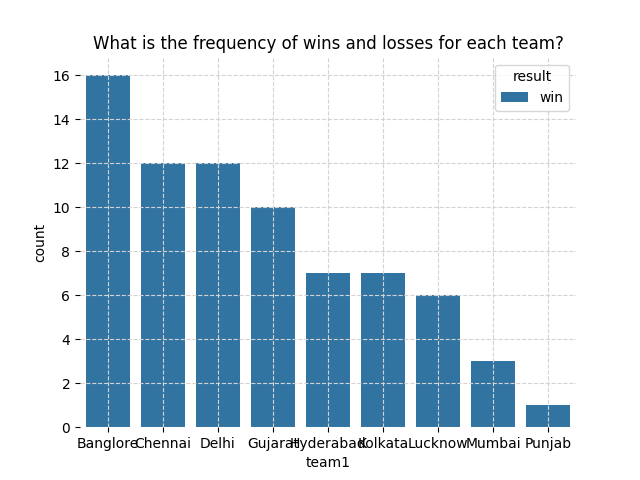

In [11]:
# Recommend 3 visualizations 
recommendations = lida.recommend(code=charts[0].code, summary=summary, n=3,  textgen_config=textgen_config)

for chart in recommendations:
    display(chart) 

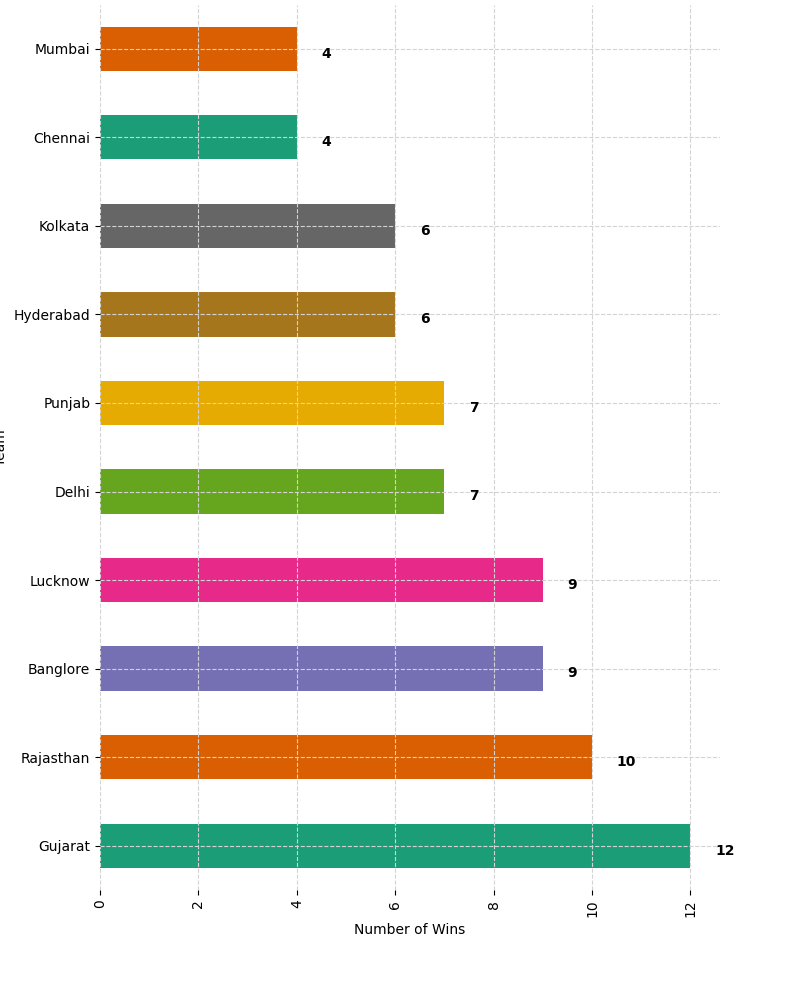

In [12]:
user_query = "Who won the most cricket games? Use a colorful palette. Show the x-axis labels in a vertical orientation. Increase height of chart by 15%"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config, library="matplotlib")  
charts[0]